In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [93]:
def adf_test(data):
    res = adfuller(data)
    print('test_stat',res[0])
    print('p_val',res[1])
    if res[1]>0.05:
        print('Ho accepted : Data is non-stationary')
    else:
        print('H1 accepted : Data is stationary')


def eval_model(test,pred,model_name):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mean_squared_error(test,pred))
    mape = mean_absolute_percentage_error(test,pred)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,'MAPE':mape},
                       index=[model_name])
    return res

def plot_res(train,test,fcast):  # fcast = forecast
    plt.plot(train,label='Train',color='blue')
    plt.plot(test,label='Test',color='orange')
    plt.plot(fcast,label='fcast',color='green')
    plt.legend()
    plt.show()
    

def arima_fun(p,d,q,model_name):
    model = ARIMA(np.log(train), order=(p,d,q))
    arima_fit = model.fit()
    fcast_arima = np.exp(arima_fit.forecast(test.shape[0]))
    print(fcast_arima)
    plot_res(train,test,fcast_arima)
    model_res = eval_model(test,fcast_arima,model_name)
    return model_res

def decompose_data(data):
    decom = seasonal_decompose(data, model='additive')
    original = decom.observed
    trend = decom.trend
    seasonal = decom.seasonal
    irr = decom.resid

    plt.plot(original,color='blue',label='Original')
    plt.plot(trend,color='red',label='Trend')
    plt.plot(seasonal,color='black',label='Seasonality')
    # plt.plot(irr,color='maroon',label='Irregular')

    plt.legend()
    plt.show()

In [97]:
df = pd.read_csv('Super_Store_data.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [98]:
df = df[['Order Date','Sales']]
df.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [99]:
df.shape

(2121, 2)

In [100]:
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [101]:
df.dtypes

Order Date     object
Sales         float64
dtype: object

In [102]:
df['Order Date'].value_counts()

9/5/2016      10
12/1/2016      9
11/19/2017     9
10/30/2017     9
12/25/2016     9
              ..
10/30/2015     1
7/9/2015       1
9/9/2016       1
6/22/2015      1
1/21/2014      1
Name: Order Date, Length: 889, dtype: int64

In [103]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()
df.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


In [104]:
df['Order Date'].value_counts()

1/1/2017      1
6/16/2014     1
6/11/2017     1
6/12/2015     1
6/12/2016     1
             ..
12/28/2017    1
12/29/2014    1
12/29/2016    1
12/29/2017    1
9/9/2017      1
Name: Order Date, Length: 889, dtype: int64

In [105]:
df.dtypes

Order Date     object
Sales         float64
dtype: object

In [106]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [107]:
df = df.sort_values('Order Date',ascending=True)
df.head()

,Order Date,Sales
49,2014-01-06,2573.820
50,2014-01-07,76.728
1,2014-01-10,51.940
4,2014-01-11,9.940
7,2014-01-13,879.939


In [108]:
# df1 = df.groupby('Order Date')['Sales'].mean().reset_index()
# df1.head()

In [109]:
# df1['Order Date'].value_counts()

In [110]:
df['Order Date'].head(30)

49    2014-01-06
50    2014-01-07
1     2014-01-10
4     2014-01-11
7     2014-01-13
10    2014-01-14
14    2014-01-16
18    2014-01-19
24    2014-01-20
26    2014-01-21
33    2014-01-26
35    2014-01-27
45    2014-01-31
358   2014-02-08
328   2014-02-11
330   2014-02-12
336   2014-02-18
342   2014-02-20
362   2014-03-01
417   2014-03-03
432   2014-03-07
367   2014-03-11
375   2014-03-14
377   2014-03-15
381   2014-03-17
383   2014-03-18
386   2014-03-19
394   2014-03-21
397   2014-03-22
402   2014-03-24
Name: Order Date, dtype: datetime64[ns]

In [111]:
df.set_index('Order Date',inplace=True)
df.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [112]:
df1 = df.copy()

In [113]:
df1 = df['Sales'].resample('W').mean().to_frame()  # week wise
df1

,Sales
Order Date,
2014-01-12,678.107000
2014-01-19,312.618250
2014-01-26,551.986000
2014-02-02,311.833000
2014-02-09,14.560000
...,...
2017-12-03,2286.881714
2017-12-10,1465.734000
2017-12-17,773.303167


In [114]:
df = df["Sales"].resample('MS').mean().to_frame()   # resampling it to months
df

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [115]:
df.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [116]:
df.shape

(48, 1)

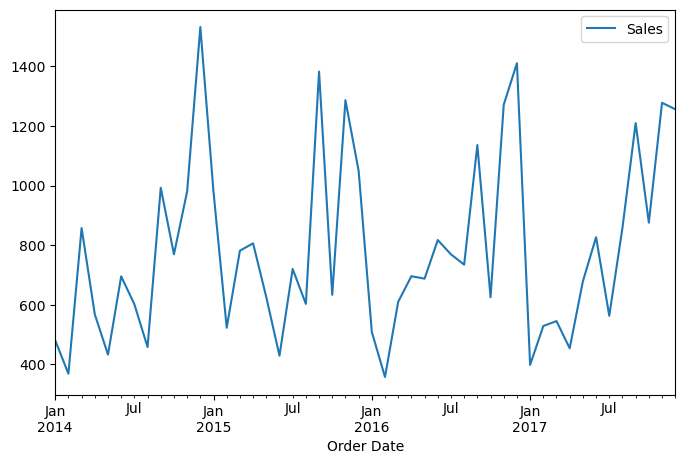

In [117]:
# plt.figure(figsize=(18,5))
df.plot(figsize=(8,5))
plt.show()

In [118]:
from statsmodels.tsa.stattools import adfuller

In [119]:
def adf_test(data):
    res = adfuller(data)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [120]:
adf_test(df)

ADF-Test_Stat -5.191070187339276
p-val 9.168756655665362e-06
H1 accepted - Data is stationary


#### Hence
d = 0

#### Decomposition

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

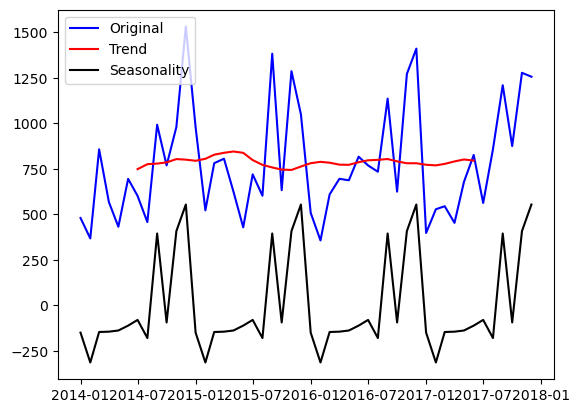

In [122]:
decompose_data(df)

In [123]:
# decomposition = seasonal_decompose(df)

# trend  = decomposition.trend
# plt.show()
# plt.plot(trend, label = "Trend")
# plt.legend(loc  = "best")

# seasonal = decomposition.seasonal
# plt.show()
# plt.plot(seasonal, label = 'Seasonal')
# plt.legend(loc = 'best')

# residual = decomposition.resid
# plt.show()
# plt.plot(residual, label = 'Residual')
# plt.legend(loc = 'best')

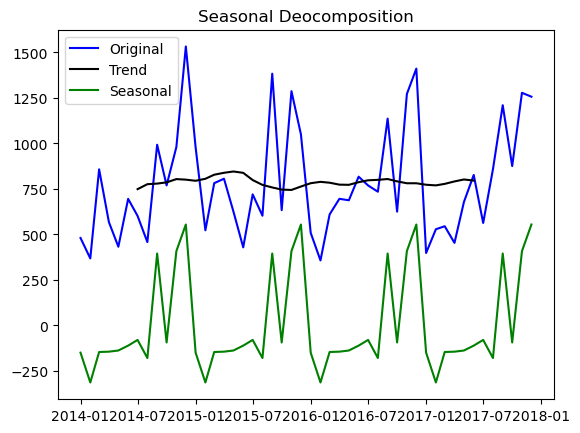

In [124]:
decom = seasonal_decompose(df,model='additive')

original = decom.observed
trend = decom.trend
seasonal = decom.seasonal

plt.plot(original,label='Original',color='blue')
plt.plot(trend,label='Trend',color='black')
plt.plot(seasonal,label='Seasonal',color='green')
plt.title('Seasonal Deocomposition')
plt.legend()
plt.show()

### Plot ACF and PACF

In [125]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

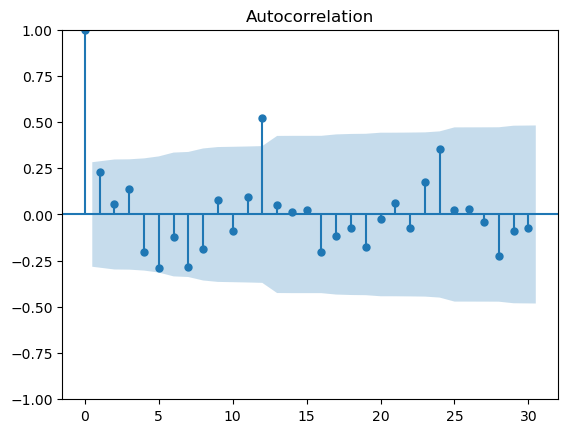

In [129]:
plot_acf(df['Sales'],lags=30)
plt.show()
# q = 12

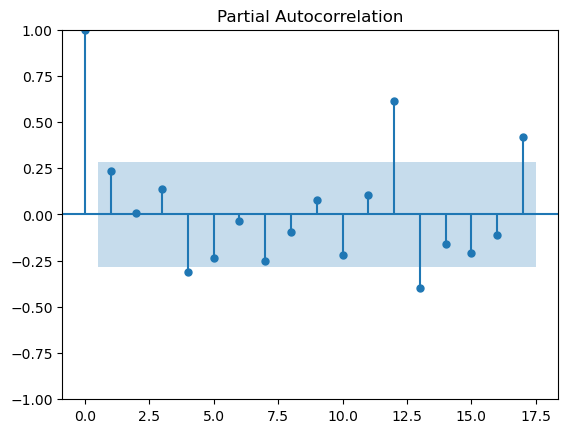

In [132]:
plot_pacf(df['Sales'])
plt.show()
# p = 12

#### Split data into train and test

In [140]:
train = df.iloc[:36]
test = df.iloc[36:]
print(train.shape)
print(test.shape)

# (p,d,q) = (12,0,12)

(36, 1)
(12, 1)


In [141]:
train.tail(2)

,Sales
Order Date,
2016-11-01,1271.345152
2016-12-01,1410.719808


In [144]:
test.head(2)

,Sales
Order Date,
2017-01-01,397.602133
2017-02-01,528.179800


In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [64]:
def eval_model(test,pred,model_name):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mean_squared_error(test,pred))
    mape = mean_absolute_percentage_error(test,pred)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,'MAPE':mape},
                       index=[model_name])
    return res

def plot_res(train,test,fcast):  # fcast = forecast
    plt.plot(train,label='Train',color='blue')
    plt.plot(test,label='Test',color='orange')
    plt.plot(fcast,label='fcast',color='green')
    plt.legend()
    plt.show()

In [145]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### TES (Holt Winter Method)

In [146]:
alpha = 0.2
beta = 0.5
gamma = 0.4

tes1 = ExponentialSmoothing(train, trend=None, seasonal='add')
tes1_model = tes1.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

In [149]:
fcast_tes1 = tes1_model.forecast(test.shape[0])  # test.shape[0] = 97
fcast_tes1

2017-01-01     735.000269
2017-02-01     504.514915
2017-03-01     820.972167
2017-04-01     809.713265
2017-05-01     705.513526
2017-06-01     750.073891
2017-07-01     782.313859
2017-08-01     685.777667
2017-09-01    1218.580697
2017-10-01     703.766695
2017-11-01    1251.396263
2017-12-01    1309.322207
Freq: MS, dtype: float64

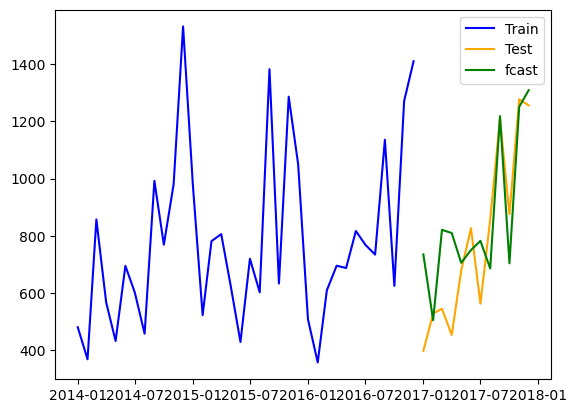

In [148]:
plot_res(train,test,fcast_tes1)

In [150]:
tes1_res = eval_model(test,fcast_tes1,'TES(0.2,0.5,0.4)')
tes1_res

,MAE,MSE,RMSE,MAPE
"TES(0.2,0.5,0.4)",145.781859,36275.881645,190.462284,0.264769


In [151]:
alpha = [0.1,0.2,0.3,0.4,0.5]
beta =  [0.1,0.2,0.3,0.4,0.5]
gamma = [0.1,0.2,0.3,0.4,0.5]


def custom_exp_smoothing(train,test,alpha,beta,gamma):
    mse_res = []
    ijk_res = []
    for i in alpha:
        for j in beta:
            for k in gamma:
                es = ExponentialSmoothing(train, trend='mul', seasonal='add')
                es_model = es.fit(smoothing_level=i, smoothing_trend=j,smoothing_seasonal=k)
                fcast = es_model.forecast(test.shape[0])
                if mean_squared_error(test,fcast) != np.inf :
    #             or mean_squared_error(test,fcast) != np.nan:
                        mse = mean_squared_error(test,fcast)
                else:
                    pass
                mse_res.append(mse)
                ijk_res.append([i,j,k])
    print(min(mse_res))
    min_mse_idx = mse_res.index(min(mse_res)) 
    print(ijk_res[min_mse_idx]) 
    

In [153]:
custom_exp_smoothing(train,test,alpha,beta,gamma)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarn

30891.20219156814
[0.1, 0.2, 0.4]


In [157]:
alpha = 0.1
beta = 0.2
gamma = 0.4

tes2 = ExponentialSmoothing(train, trend=None, seasonal='add')
tes2_model = tes2.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

In [158]:
fcast_tes2 = tes2_model.forecast(test.shape[0])  # test.shape[0] = 97
fcast_tes2

2017-01-01     693.285714
2017-02-01     460.392106
2017-03-01     774.805333
2017-04-01     757.283570
2017-05-01     660.053293
2017-06-01     713.711586
2017-07-01     751.507253
2017-08-01     658.940794
2017-09-01    1199.383878
2017-10-01     683.598339
2017-11-01    1228.749592
2017-12-01    1293.516409
Freq: MS, dtype: float64

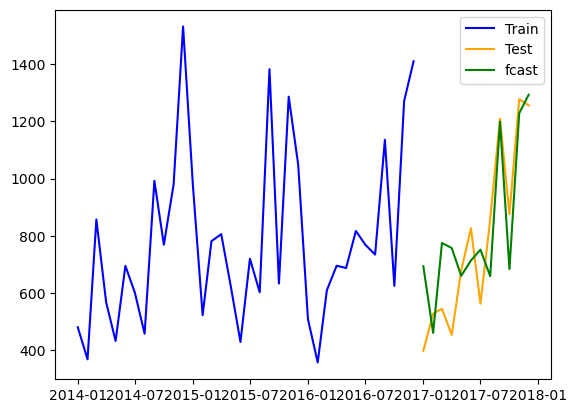

In [159]:
plot_res(train,test,fcast_tes2)

In [160]:
tes2_res = eval_model(test,fcast_tes2,'TES(0.1,0.1,0.5)')
tes2_res

,MAE,MSE,RMSE,MAPE
"TES(0.1,0.1,0.5)",142.057188,30533.217899,174.737569,0.249315


#### ARIMA(2,0,1)

2017-01-01    949.547393
2017-02-01    873.594995
2017-03-01    841.081849
2017-04-01    830.601802
2017-05-01    826.747997
2017-06-01    825.384695
2017-07-01    824.893353
2017-08-01    824.717254
2017-09-01    824.653973
2017-10-01    824.631251
2017-11-01    824.623090
2017-12-01    824.620158
Freq: MS, Name: predicted_mean, dtype: float64


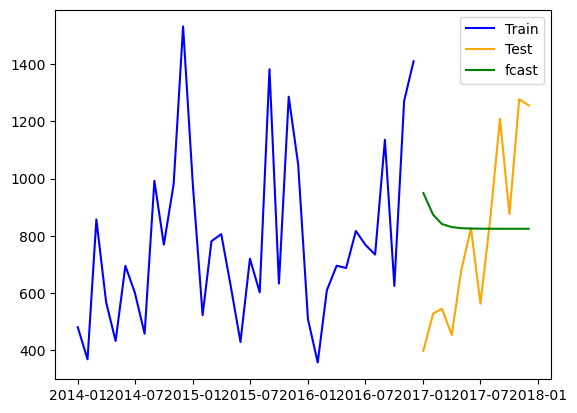

In [181]:
arima_m1 = arima_fun(2,1,1,'ARIMA(2,1,1)')

#### Custom ARIMA

In [176]:
p = list(range(0,5)) # 0,1,2...,13
q = list(range(0,5)) # 0,1,2...,13
d = list(range(0,1))  # 0

pdq = []
mse_res = []
for i in p:
    for j in d:
        for k in q:
            m = ARIMA(train,order=(i,j,k))
            arima = m.fit()
            ypred = arima.forecast(test.shape[0])
            mse = mean_squared_error(test,ypred)
            pdq.append((i,j,k))
            mse_res.append(mse)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\st

In [178]:
# print(pdq)
# print(rmse_res)

min_mse = min(mse_res)
print(min_mse)
min_mse_idx = mse_res.index(min_mse)
print(min_mse_idx)
print(pdq[24])

27339.808543699797
24
(4, 0, 4)


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2017-01-01     609.747400
2017-02-01     510.456990
2017-03-01     678.674396
2017-04-01     456.853945
2017-05-01     473.181159
2017-06-01     751.383917
2017-07-01     598.160465
2017-08-01     689.695620
2017-09-01    1092.313722
2017-10-01     828.403235
2017-11-01     862.812381
2017-12-01    1160.980511
Freq: MS, Name: predicted_mean, dtype: float64


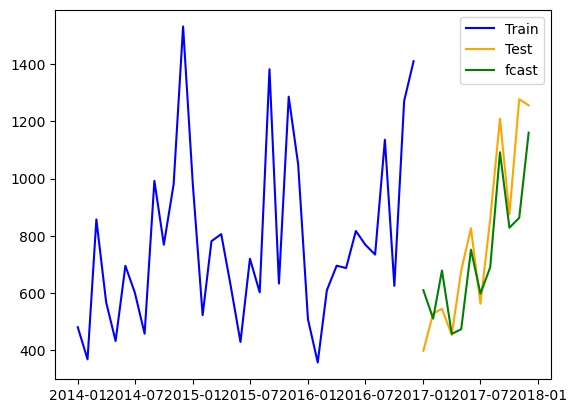

In [180]:
custom_arima =  arima_fun(4,0,4,'ARIMA(4,0,4)')

In [183]:
res = pd.concat([tes1_res,tes2_res,arima_m1,custom_arima])
res

,MAE,MSE,RMSE,MAPE
"TES(0.2,0.5,0.4)",145.781859,36275.881645,190.462284,0.264769
"TES(0.1,0.1,0.5)",142.057188,30533.217899,174.737569,0.249315
"ARIMA(2,1,1)",278.048969,107380.417407,327.689514,0.434863
"ARIMA(4,0,4)",127.160299,28150.954452,167.782462,0.168735
